In [1]:
#Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

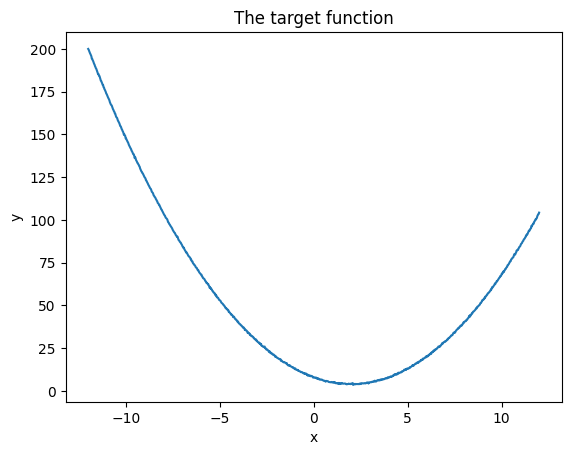

In [3]:
def fnc(x,Np):   # Np is number of data points to be generated from the target function. 
#If you want to generate a single data point put Np=1. If you want to plot the target function put higher value of Np.
    Noise = np.random.normal(0,0.2,Np)
    return (x-2)**2 + 4 + Noise
plt.title("The target function")
# plt.xlim(0,4)
# plt.ylim(0,10)
plt.xlabel("x")
plt.ylabel("y")
# plt.scatter(x,y)
x = np.linspace (-12,12,1000)
plt.plot(x,fnc(x,1000))

[[  7.91523766  39.29643079]
 [  9.32292073  57.50434145]
 [ -8.31854451 110.72311082]]


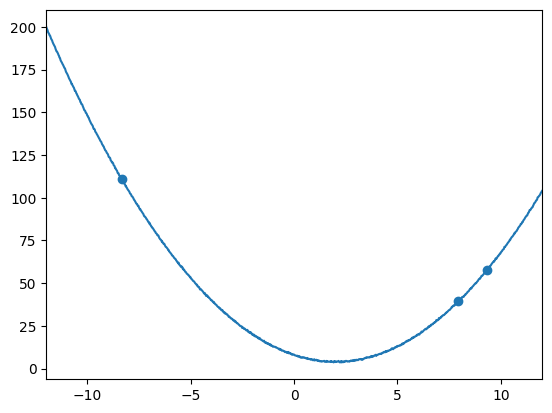

In [20]:
import numpy as np

# np.random.seed(129292)
data_array = np.empty((0, 2))

for i in range(3):
    xl = np.random.uniform(-10,10,1).item()
    data = np.array([[xl, fnc(xl,1).item()]])
    data_array = np.vstack([data_array, data])


print(data_array)

x_values = data_array[:, 0]  # First column
y_values = data_array[:, 1]  # Second column
plt.scatter(x_values,y_values)
plt.xlim(-12,12)
plt.plot(x,fnc(x,1000))


In [10]:
n_dataset = 1
b_list = []
for i in range(n_dataset):
    xl = np.random.uniform(-10,10,3)
    yl = fnc(xl,3)
    def mse(b):
        return np.sum((yl-b)**2)/3
    result = minimize_scalar(
    lambda x: mse(x),  # Negative for maximization
    bounds=(0,300),  # Search range
    method='bounded')
    b_opt = result["x"]
    print(yl)
    print (b_opt)
    


[10.90996955 12.97338239 24.51084358]
16.13139850483755


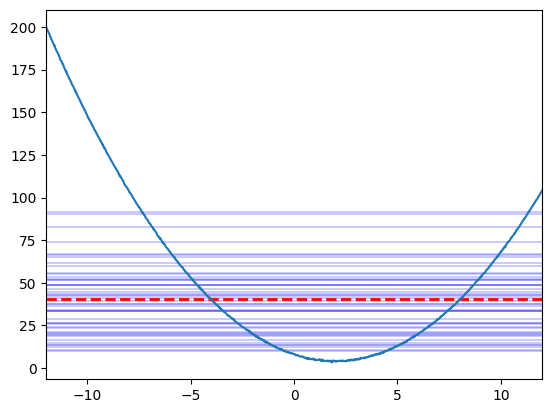

In [36]:
n_dataset = 50
b_list = []
for i in range(n_dataset):
    xl = np.random.uniform(-10,10,3)
    yl = fnc(xl,3)
    def mse(b):
        return np.sum((yl-b)**2)/3
    result = minimize_scalar(
    lambda x: mse(x),  # Negative for maximization
    bounds=(0,300),  # Search range
    method='bounded')
    b_opt = result["x"]
    b_list.append(b_opt)
    plt.xlim(-12,12)
    plt.plot(x,b_opt*np.ones(1000),c='b',lw=0.3)
b = np.mean(b_list)
plt.xlim(-12,12)
plt.plot(x,(b*np.ones(1000)),ls = '--',c='r',lw=2)
plt.plot(x,fnc(x,1000))
    

[35.16818424 28.22001144 15.82941625]
-1.1825035487573652 29.85611969240122


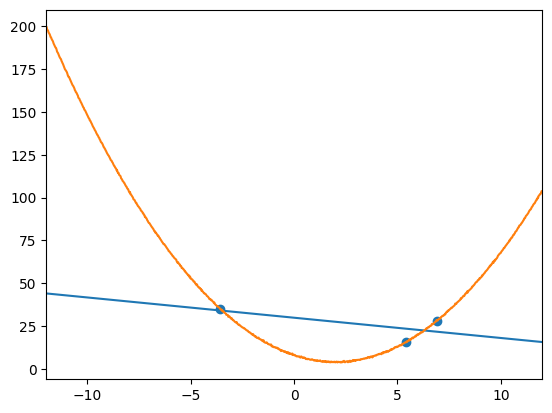

In [23]:
from scipy.optimize import minimize

n_dataset = 1
b_list = []
for i in range(n_dataset):
    xl = np.random.uniform(-10,10,3)
    yl = fnc(xl,3)
    def mse(params):
        a,b = params
        return np.sum((yl-((a*xl)+b))**2)/3
    initial_guess = [0, 0]
    result = minimize(mse, initial_guess)
    a_opt = result.x[0]
    b_opt = result.x[1]
    print(yl)
    print (a_opt,b_opt)

plt.scatter(xl,yl)
plt.xlim(-12,12)
plt.plot(x,(a_opt*x+b_opt))
plt.plot(x,fnc(x,1000))

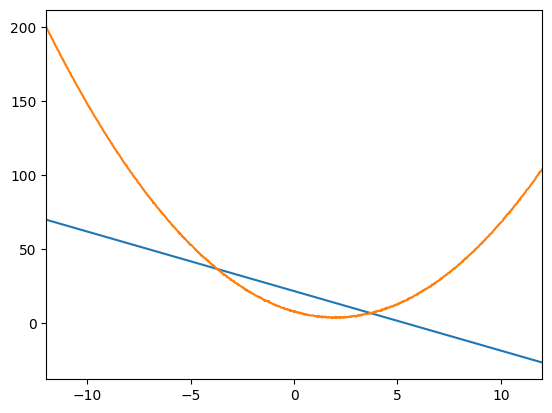

In [25]:
from scipy.optimize import minimize

n_dataset = 10000
a_list = []
b_list = []
for i in range(n_dataset):
    xl = np.random.uniform(-10,10,3)
    yl = fnc(xl,3)
    def mse(params):
        a,b = params
        return np.sum((yl-((a*xl)+b))**2)/3
    initial_guess = [0, 0]
    result = minimize(mse, initial_guess)
    a_opt = result.x[0]
    b_opt = result.x[1]
    a_list.append(a_opt)
    b_list.append(b_opt)
a = np.mean(a_list)
b = np.mean(b_list)
plt.xlim(-12,12)
plt.plot(x,(a*x+b))
plt.plot(x,fnc(x,1000))

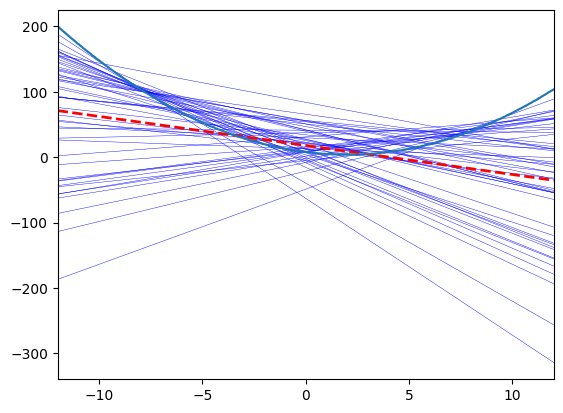

In [31]:
from scipy.optimize import minimize

n_dataset = 50
a_list = []
b_list = []
for i in range(n_dataset):
    xl = np.random.uniform(-10,10,3)
    yl = fnc(xl,3)
    def mse(params):
        a,b = params
        return np.sum((yl-((a*xl)+b))**2)/3
    initial_guess = [0, 0]
    result = minimize(mse, initial_guess)
    a_opt = result.x[0]
    b_opt = result.x[1]
    a_list.append(a_opt)
    b_list.append(b_opt)
    plt.xlim(-12,12)
    plt.plot(x,(a_opt*x+b_opt),c='b',lw=0.3)
a = np.mean(a_list)
b = np.mean(b_list)
plt.xlim(-12,12)
plt.plot(x,(a*x+b),ls = '--',c='r',lw=2)
plt.plot(x,fnc(x,1000))